In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset:
amz_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
amz_raw.head()

# Assign column names to dataset:
amz_raw.columns = ['review','score']

amz_raw.head()

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
amz_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
review    1000 non-null object
score     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
# Check for class imbalance:
amz_raw.groupby('score')['score'].count()

score
0    500
1    500
Name: score, dtype: int64

In [5]:
# Convert all reviews to lower case to avoid inconsistency:
amz_raw['review'] = amz_raw['review'].str.lower()

#Create a list of all positive keywords that potentially result in good scores:
keywords = ['good', 'great', 'love', 'amazing', 'excellent', 'highly recommend', 'wow', 
          'recommended', 'must', 'impressed', 'impressive', 'like', 'enjoy', 'awesome', 'wonderful', 
           'incredible', 'fun', 'well', 'good', 'beautiful']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    amz_raw[str(key)] = amz_raw['review'].str.contains(str(key), case=False)
    
amz_raw.head()

,review,score,good,great,love,amazing,excellent,highly recommend,wow,recommended,...,impressed,impressive,like,enjoy,awesome,wonderful,incredible,fun,well,beautiful
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",1,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Convert 'score' to True-False:
amz_raw['score'] = (amz_raw['score'] == 1)

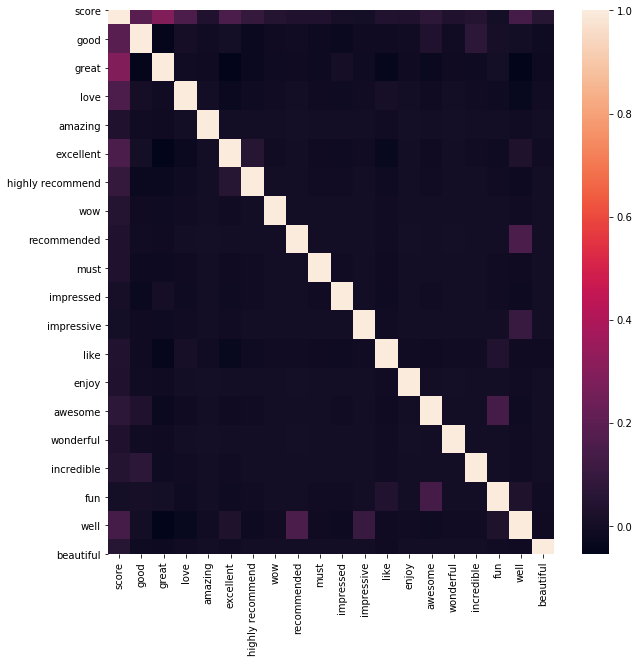

In [7]:
# Plot a heatmap to inspect the correlation of different variables:
plt.figure(figsize=(10,10))
sns.heatmap(amz_raw.corr())

In [8]:
# Create target variable:
data = amz_raw[keywords]
target = amz_raw['score']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("The accuracy of the model is {}".format(1-(target != y_pred).sum()/data.shape[0]))

Number of mislabeled points out of a total 1000 points : 282
The accuracy of the model is 0.718


In [10]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Samp le: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.76
Testing on Samp le: 0.718


In [11]:
# Use cross validation to detect errors:
from sklearn.model_selection import cross_val_score

cross_val_score(bnb, data, target, cv=10)

array([0.8 , 0.73, 0.75, 0.74, 0.72, 0.7 , 0.64, 0.67, 0.73, 0.62])